# SHAP values plots created

## Installing the Shap software

In [1]:
# pip install shap

In [2]:
import xgboost as xgb
import shap
import pandas as pd

df = pd.read_csv("df_sum_score_ex.csv")
df

,Unnamed: 0,GENDER,STRATUM,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,COL_GRADE_AVG,HI_GRADE_AVG,GENDER_bin
0,0,F,Stratum_4,PRIVATE,ACADEMIC,71,81,61,86,82,71,93,71,93,79,181,98.000000,76.2,1
1,1,F,Stratum_5,PRIVATE,ACADEMIC,83,75,66,100,88,97,38,86,98,78,201,99.666667,82.4,1
2,2,M,Stratum_2,PRIVATE,ACADEMIC,52,49,38,46,42,17,1,18,43,22,113,35.666667,45.4,0
3,3,F,Stratum_2,PRIVATE,ACADEMIC,56,55,51,64,73,65,35,76,80,48,137,73.500000,59.8,1
4,4,M,Stratum_4,PRIVATE,ACADEMIC,80,65,76,85,92,94,94,98,100,71,189,107.666667,79.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,12406,M,Stratum_2,PRIVATE,ACADEMIC,67,69,70,67,81,88,71,86,87,65,142,89.833333,70.8,0
12407,12407,M,Stratum_2,PUBLIC,ACADEMIC,58,57,61,63,53,46,39,44,11,0,127,44.500000,58.4,0
12408,12408,M,Stratum_2,PRIVATE,ACADEMIC,66,69,75,70,58,98,88,90,81,87,192,106.000000,67.6,0
12409,12409,F,Stratum_3,PRIVATE,ACADEMIC,53,69,64,59,52,60,80,51,8,42,121,60.333333,59.4,1


In [3]:

X = df.drop(['COL_GRADE_AVG','GENDER','Unnamed: 0','CR_PRO','CC_PRO','ENG_PRO','CR_S11','CC_S11','MAT_S11', 'ENG_S11','BIO_S11',"QR_PRO","WC_PRO" ,"FEP_PRO"], axis=1).copy()
y=df['COL_GRADE_AVG'].copy()



# Observations

- Hvis man intet average hi school har med og man har alle individuelle karakterer, 
stratum osv er den prioriterede rækkefølge af impact: 
    - eng, cr, cc, bio, mat, stra 1, stra 3, private, type academic

- hvis man fjerner stratum, og alle individuelle karakterer:
    - average hi school, gender, nature private, type tech, type academic, type, nature public

- Det som vi ser er at hvis vi kører modellen på alle karakterer og stratum osv, så betyder gender ingenting. 

Hvis vi kører det på 


- hvis man kører den kun på alle de socio og ENG_S11, så er det en ulempe at være kvinde
- hvis man kører den kun på alle de socio og BIO_S11, så er det en fordel at være kvinde

In [4]:

X_encoded = pd.get_dummies(X,columns=['STRATUM','SCHOOL_TYPE','SCHOOL_NAT'])#'STRATUM',
X_encoded = X_encoded.drop(['STRATUM_0','SCHOOL_TYPE_Not_apply'], axis=1).copy() #'STRATUM_0'

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state=24, test_size=0.33)#, stratify=y)


# # without sensitive attributes
# X = df.drop(['COL_GRADE_AVG','GENDER','Unnamed: 0','CR_S11','CC_S11','ENG_S11','CR_PRO','CC_PRO','ENG_PRO', 'STRATUM','GENDER_bin'], axis=1).copy()
# y = df['COL_GRADE_AVG'].copy()
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24, test_size=0.33)#, stratify=y)

In [5]:
# dfs = X_train.copy()
# for column in dfs.columns:
#     try:
#         dfs[column] = (dfs[column] - dfs[column].mean())/dfs[column].std()  
#     except:
#         pass
# # #Check means are 0 and std 1
# # print("mean column HI grade: ", dfs.HI_GRADE_AVG.mean(), "std column HI grade: ", dfs.HI_GRADE_AVG.std(),)
# X_train = dfs

In [6]:
# #apply standardization to filtered original dataframe
# dfs = X_test.copy()
# for column in dfs.columns:
#     try:
#         dfs[column] = (dfs[column] - dfs[column].mean())/dfs[column].std()  
#     except:
#         pass
# # #Check means are 0 and std 1
# # print("mean column HI grade: ", dfs.HI_GRADE_AVG.mean(), "std column HI grade: ", dfs.HI_GRADE_AVG.std(),)
# X_test = dfs

In [7]:
import matplotlib as mpl
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (6,3)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()
# from matplotlib import rcParams


In [8]:

final_model = xgb.XGBRegressor(seed=24, objective='reg:squarederror', max_depth=3, learning_rate=0.05, gamma=0,reg_lambda=10.0, scale_pos_weight=1)
final_model.fit(X_train,y_train,verbose=True, eval_metric='rmse')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=24,
             reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, seed=24,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [9]:
import matplotlib.pyplot as plt
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(final_model)
shap_values = explainer(X_train)

# # visualize the first prediction's explanation
# for i in range(4):
#     shap.plots.waterfall(shap_values[i], show = False)
#     plt.savefig("shap_plot" + str(i) + ".png")

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.


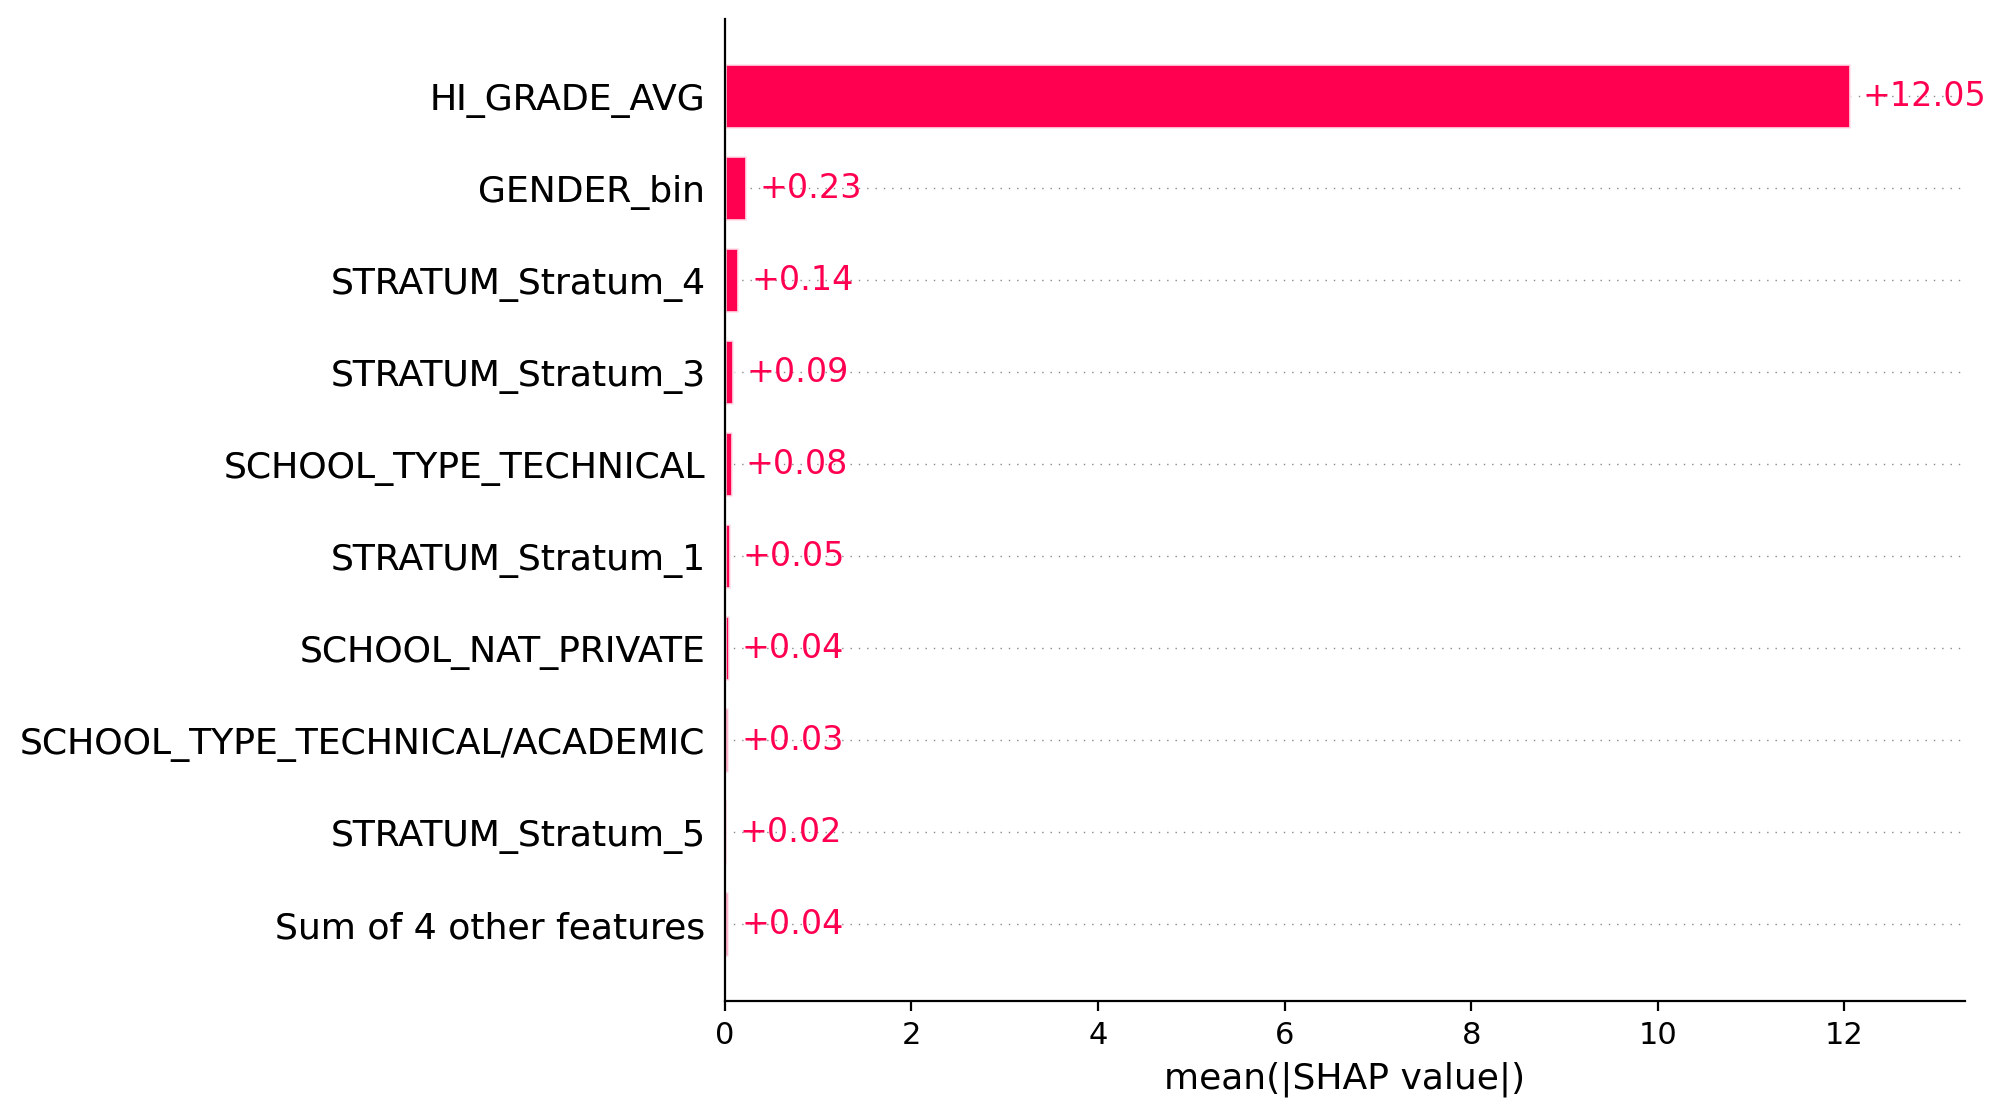

In [10]:
shap.plots.bar(shap_values,show='False')


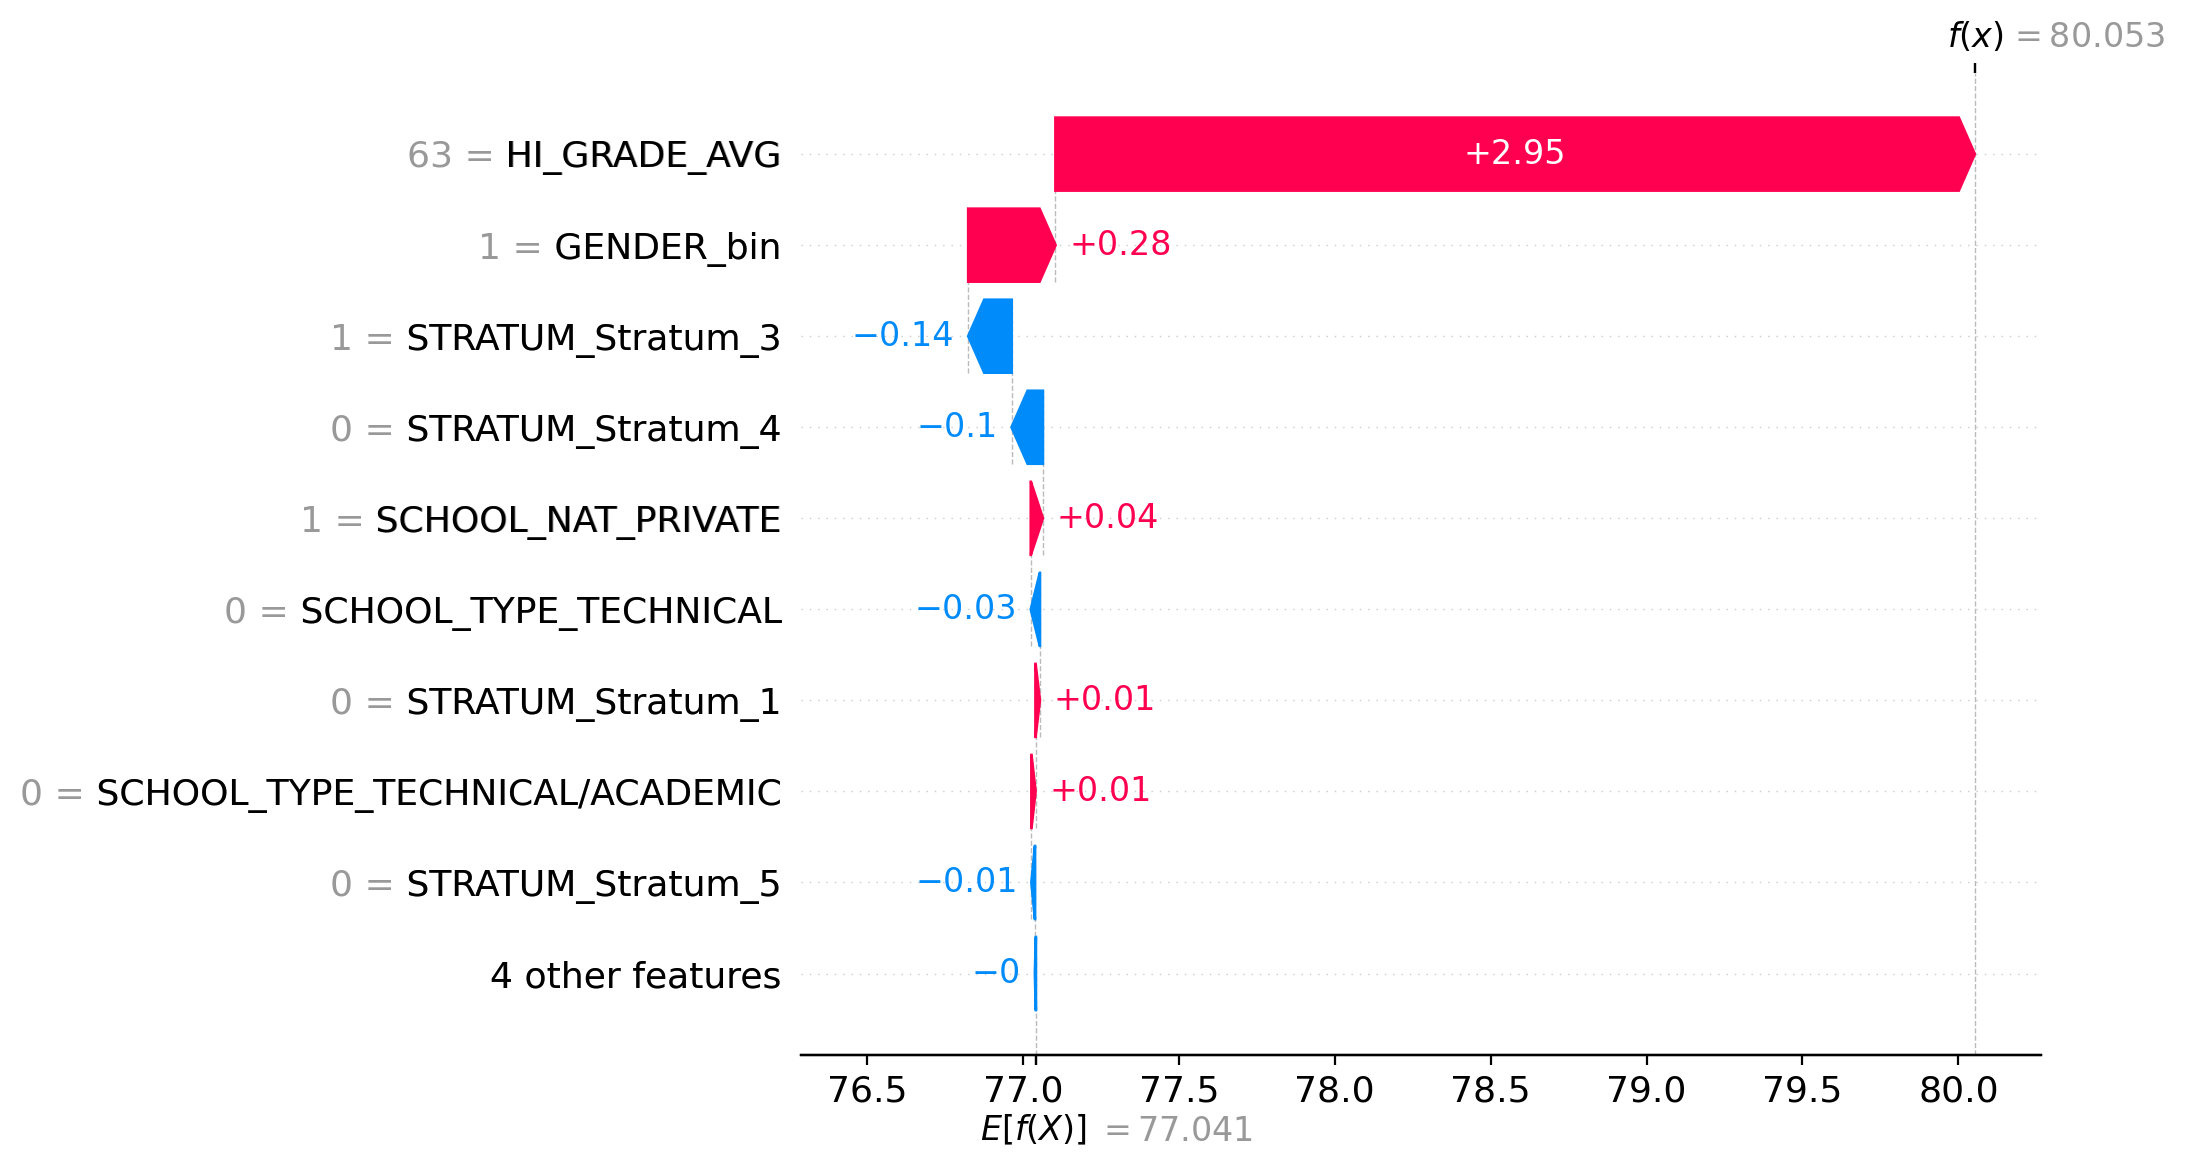

In [11]:
shap.plots.waterfall(shap_values[1], show=False)
plt.savefig("shap_plot_1.png", bbox_inches='tight')


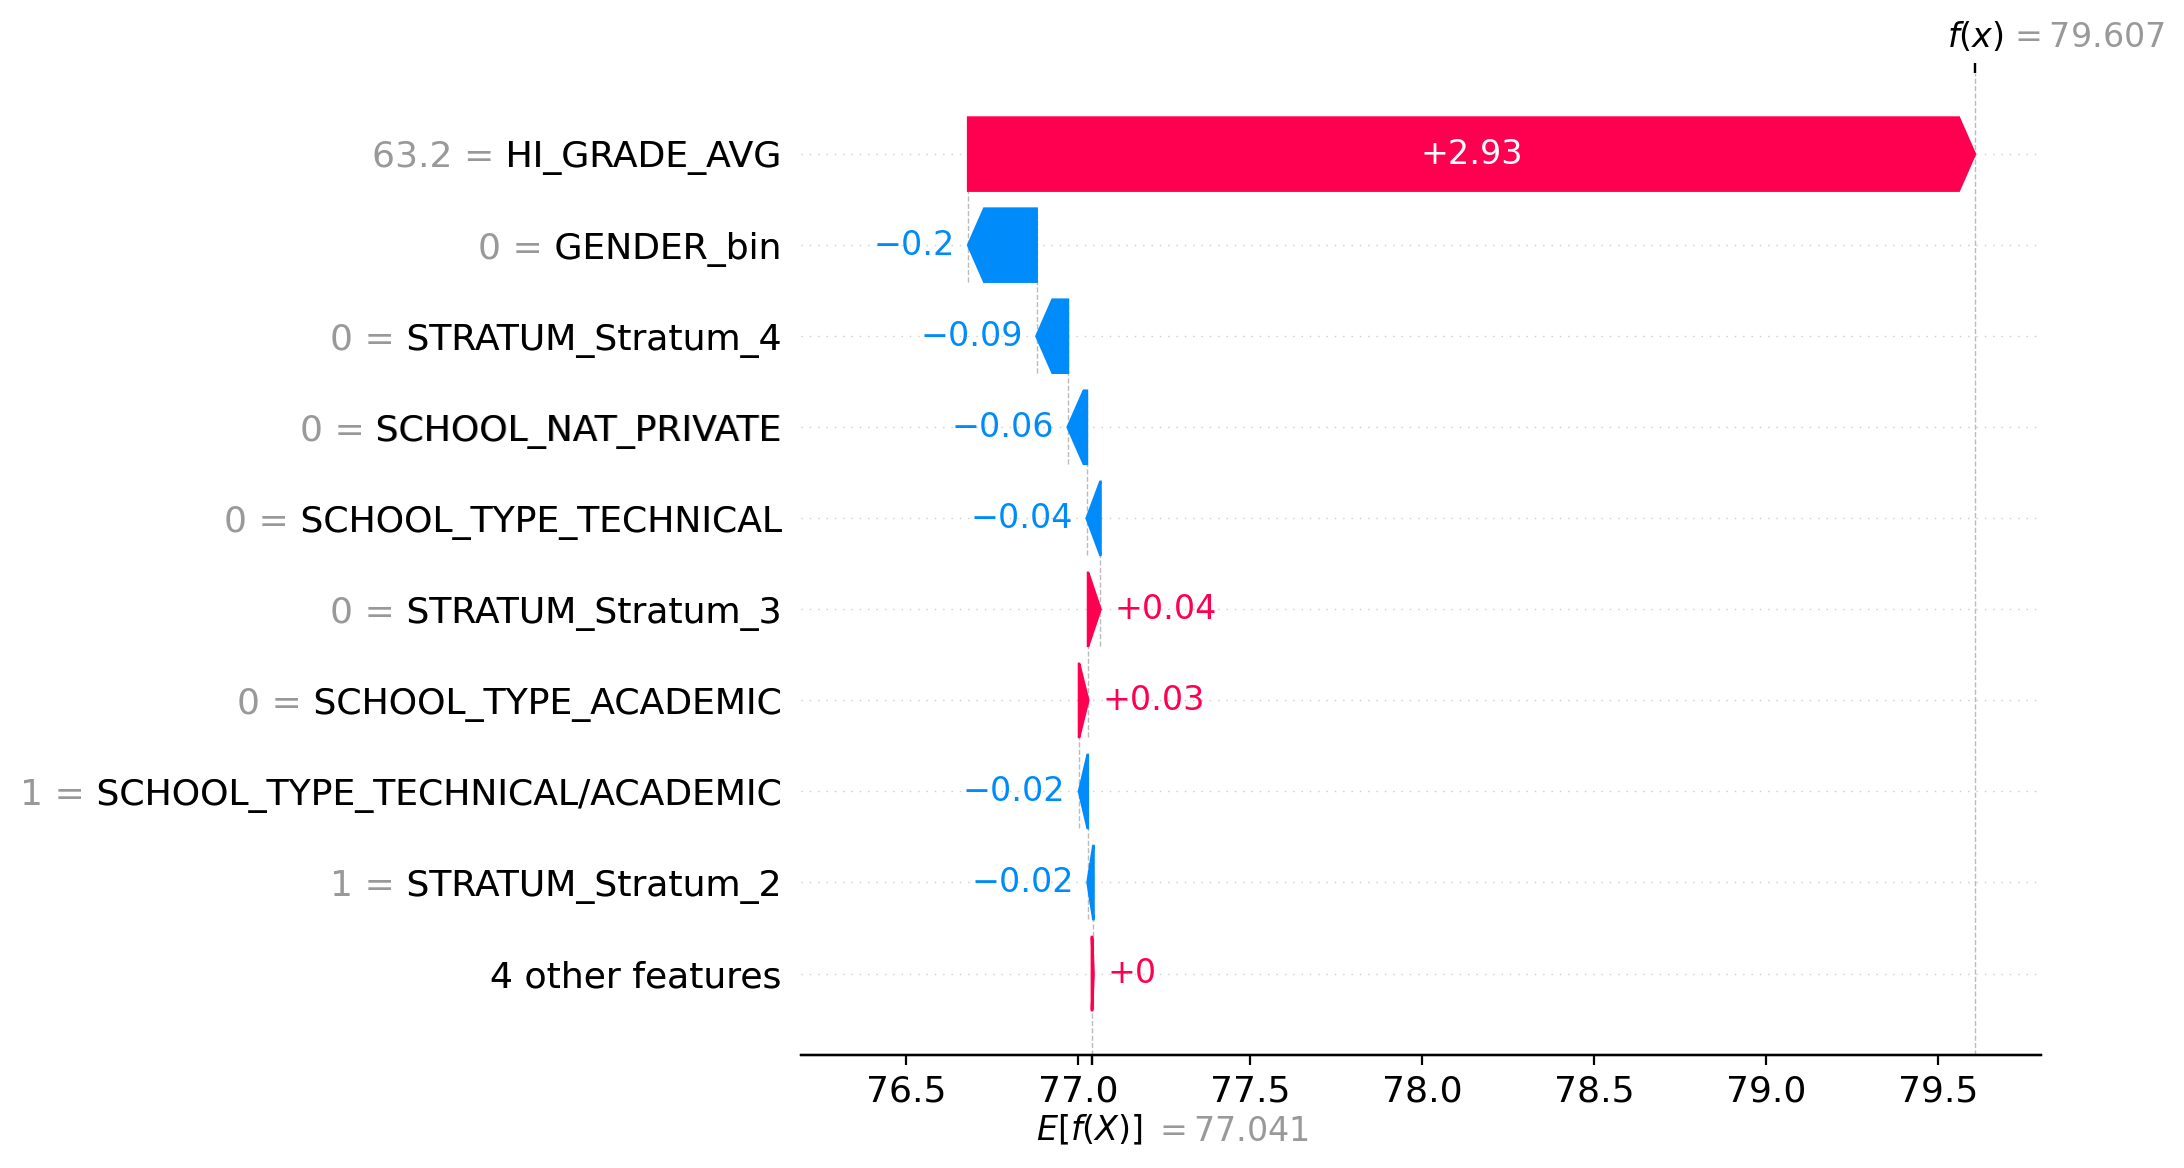

In [12]:

shap.plots.waterfall(shap_values[2], show=False)
plt.savefig("shap_plot_2.png", bbox_inches='tight')


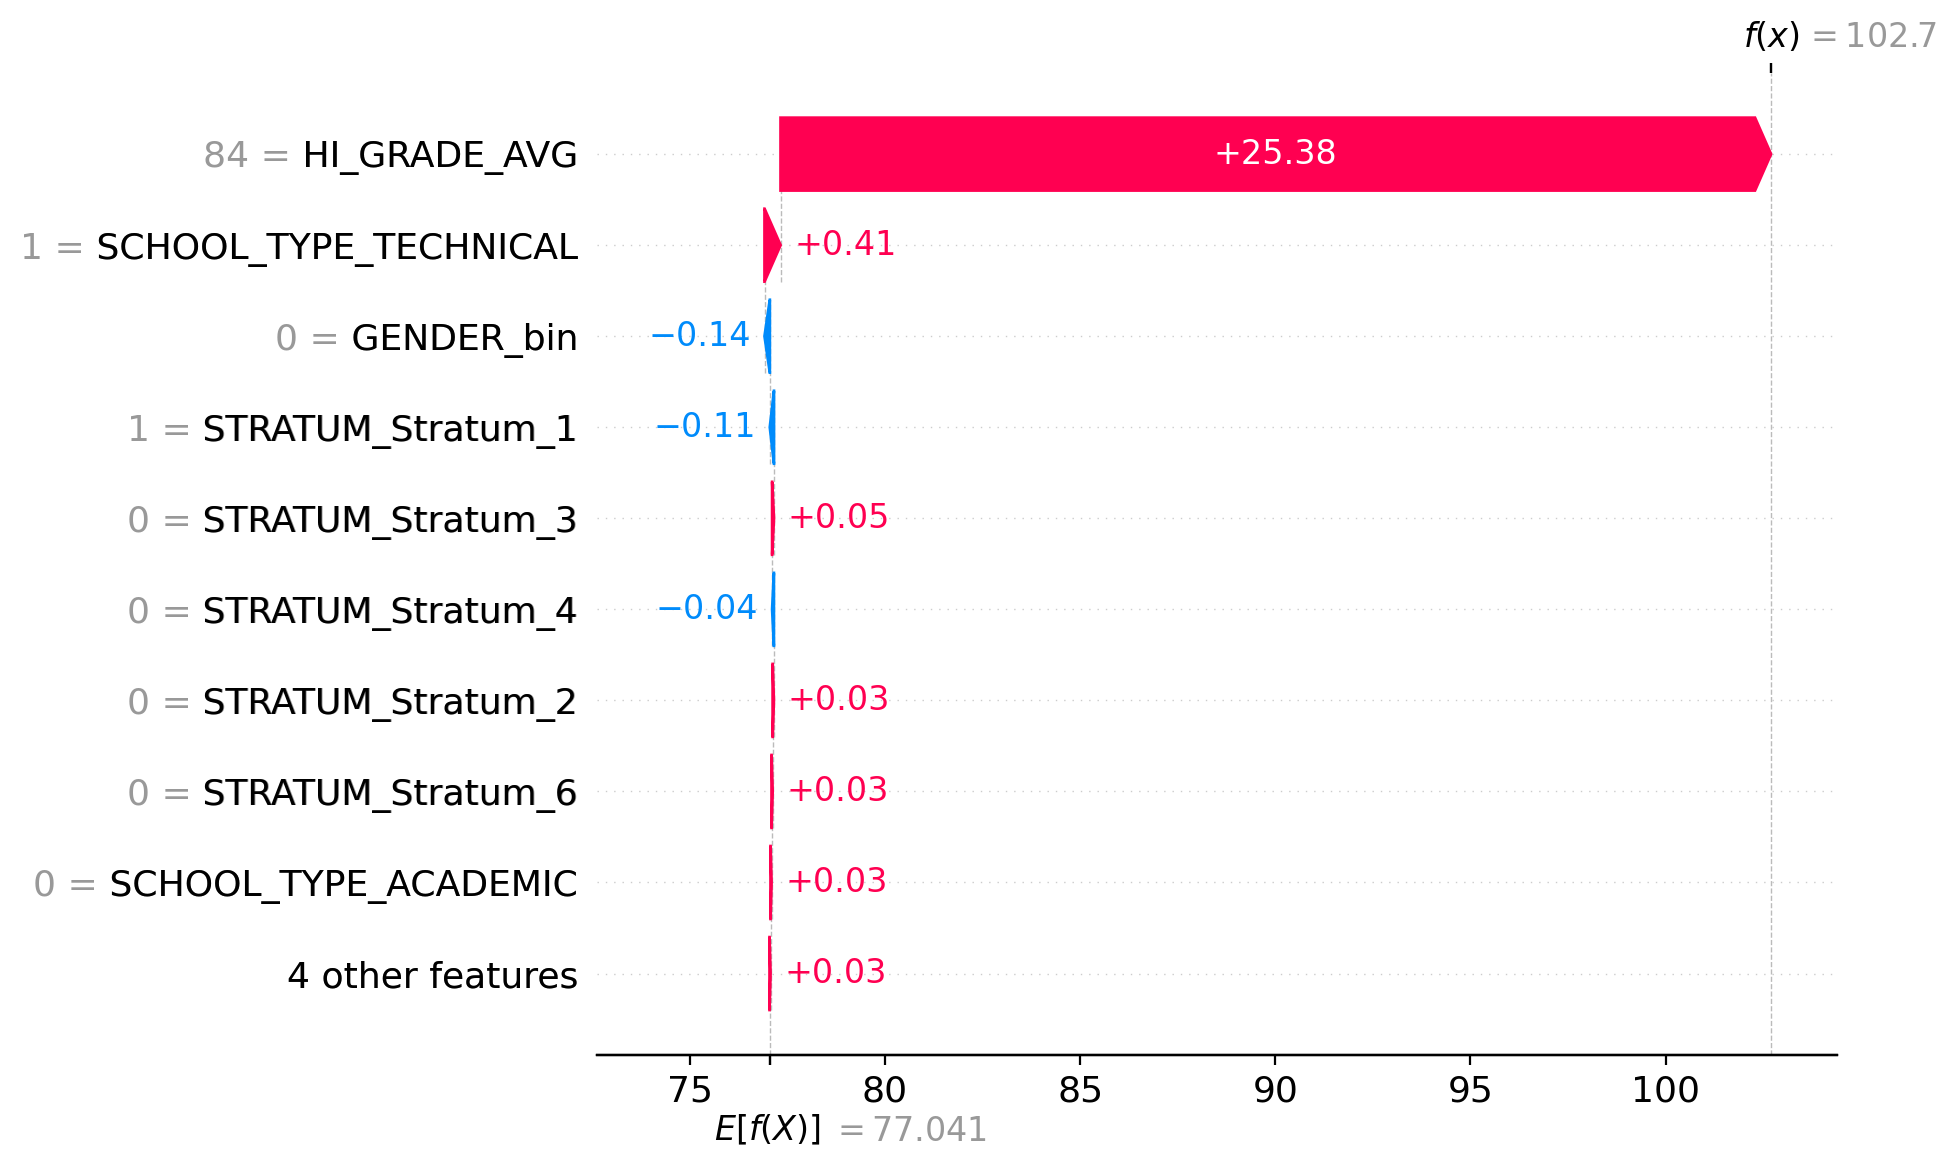

In [13]:

shap.plots.waterfall(shap_values[3], show=False)
plt.savefig("shap_plot_3.png", bbox_inches='tight')


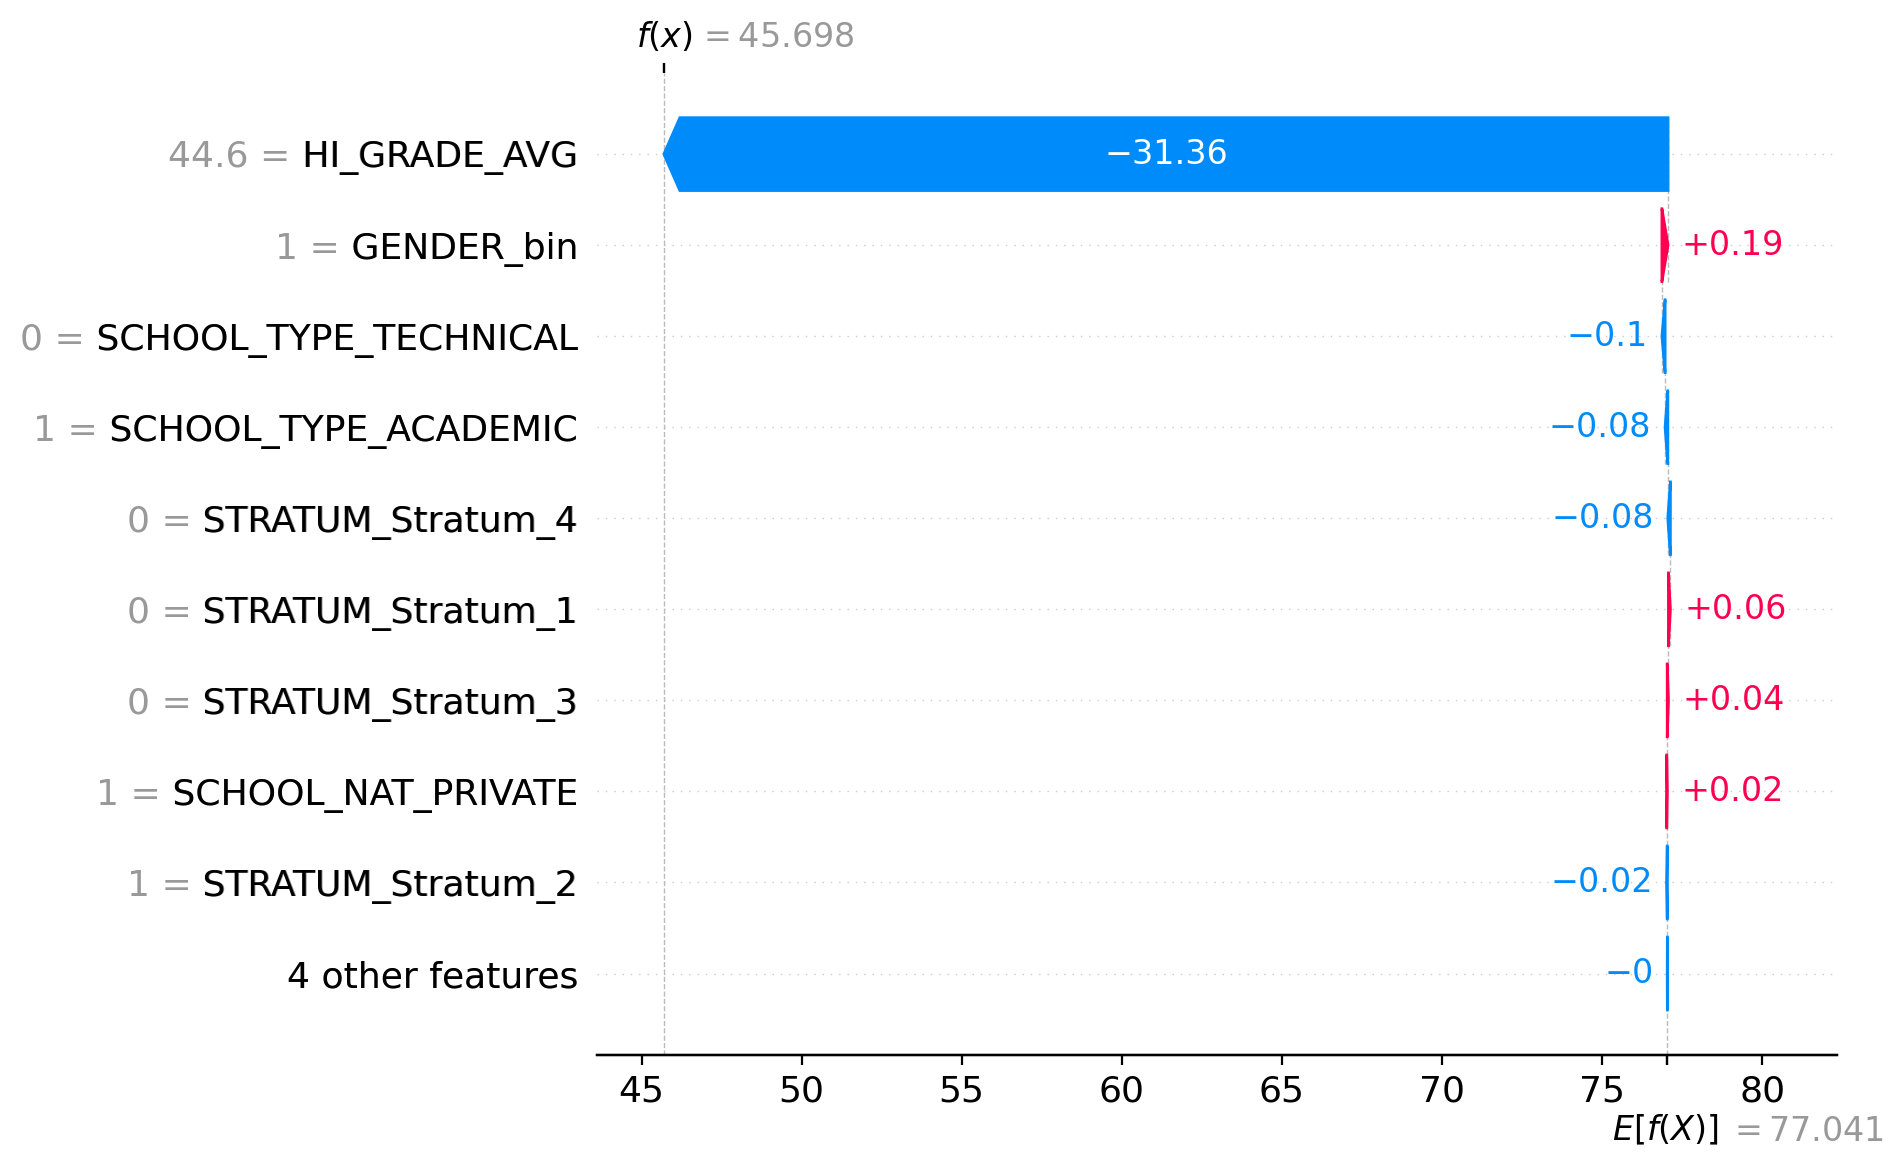

In [14]:

shap.plots.waterfall(shap_values[4], show=False)
plt.savefig("shap_plot_4.png", bbox_inches='tight')

In [15]:
shap.TreeExplainer(final_model).shap_interaction_values(X_train)

array([[[-1.9022896e+01,  1.5187302e-01,  1.3632438e-01, ...,
          2.2094417e-02, -1.3174523e-02,  0.0000000e+00],
        [ 1.5187645e-01, -1.8301576e-01,  0.0000000e+00, ...,
          0.0000000e+00, -8.1554195e-04,  0.0000000e+00],
        [ 1.3632488e-01,  0.0000000e+00, -2.7183974e-01, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 2.2093773e-02,  0.0000000e+00,  0.0000000e+00, ...,
          2.6094362e-02,  0.0000000e+00,  0.0000000e+00],
        [-1.3174057e-02, -8.1554428e-04,  0.0000000e+00, ...,
          0.0000000e+00,  3.0732334e-02,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 2.9353149e+00,  5.4629147e-04, -1.3948345e-02, ...,
         -1.3046860e-02,  6.3088723e-03,  0.0000000e+00],
        [ 5.4621696e-04,  3.0609775e-01,  0.0000000e+00, ...,
          0.0000000e+00,  1.4865659e-03,  0.0000000e+00],
        [-1.3948321e-02, 

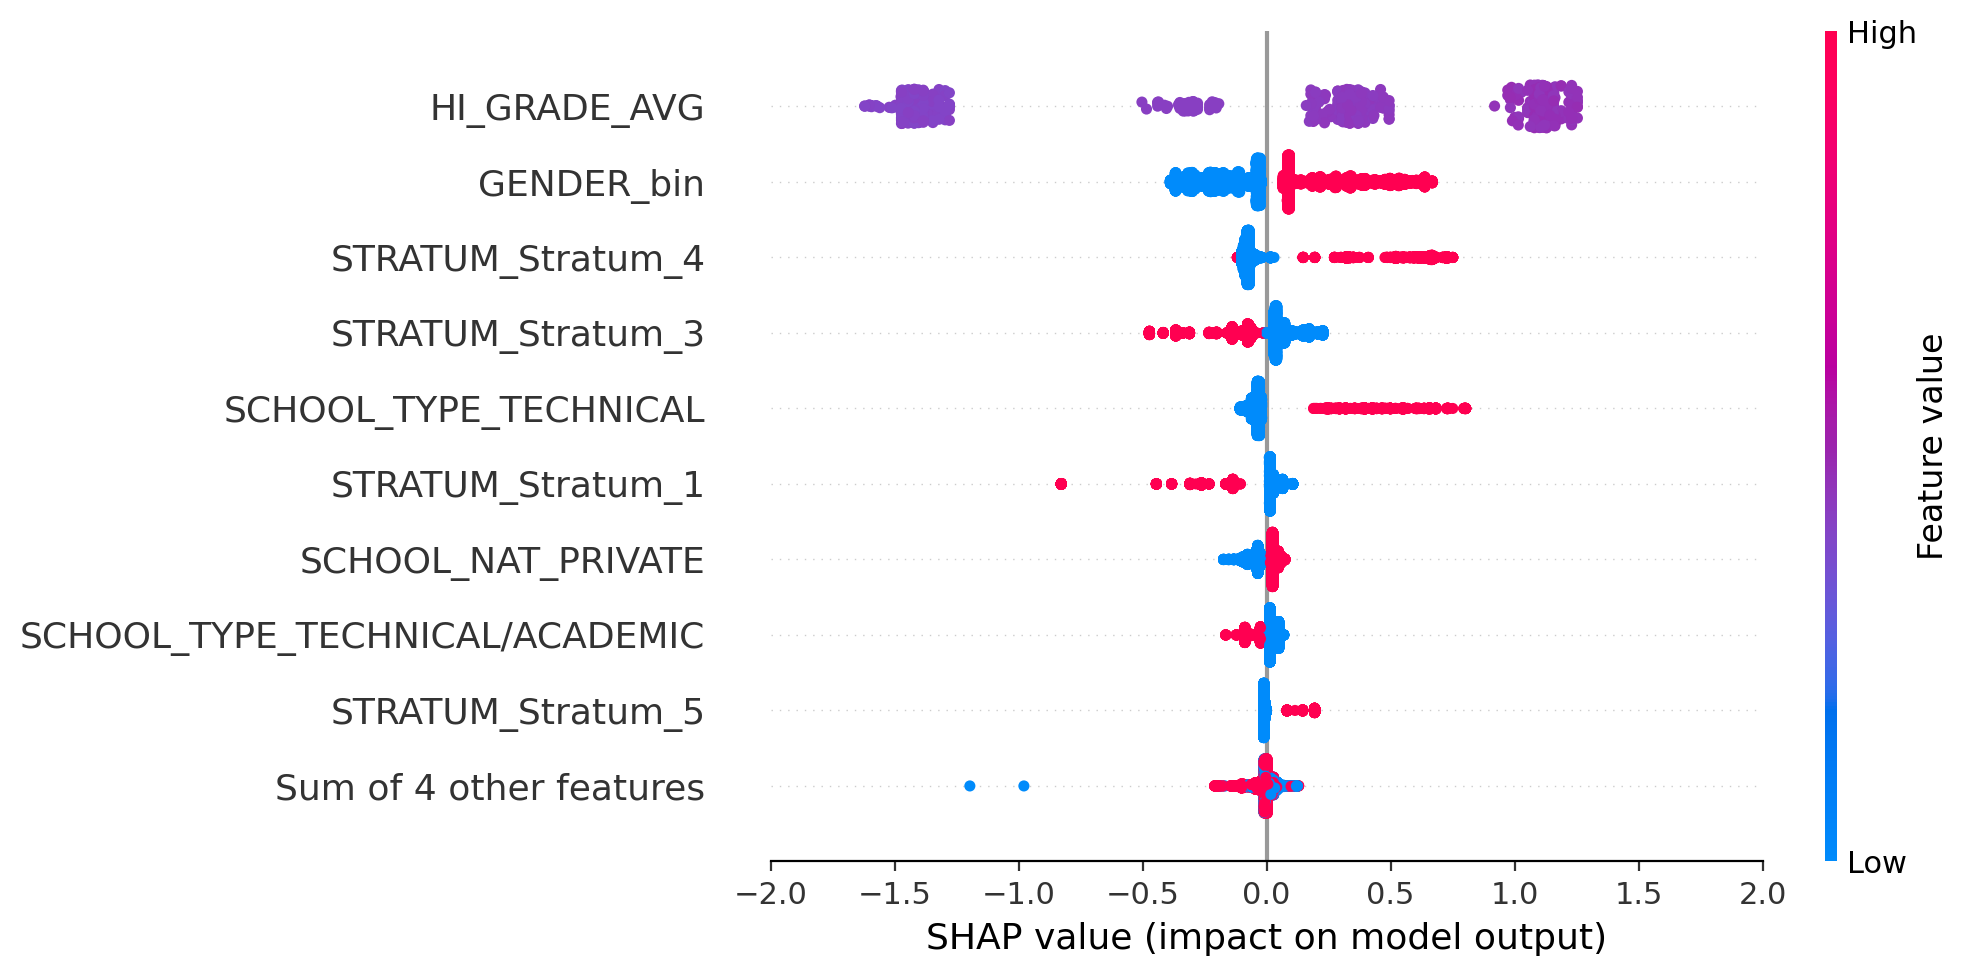

In [16]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (10,3)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()
import matplotlib.pylab as pl
# summarize the effects of all the features
shap.plots.beeswarm(shap_values, show=False)
pl.xlim(-2,2)
# plt.savefig("shap_plot_all_zoom.png", bbox_inches='tight')
pl.show()


Of this plot we can see that according to the model the feature yielding most information about an individual's average college grade is their high school average grade. The second most important feature, when predicting the college grade is the gender, accoring to the model.

The color shows the value of the feature, and the position on the horizontal axis shows what impact this feature value would have on the model's decision. Looking at the 

In [17]:
def c_statistic_harrell(pred, labels):
    total = 0
    matches = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if labels[j] > 0 and abs(labels[i]) > labels[j]:
                total += 1
                if pred[j] > pred[i]:
                    matches += 1
    return matches/total

# see how well we can order people by survival
c_statistic_harrell(model_train.predict(xgb_test, ntree_limit=5000), y_test)

NameError: name 'model_train' is not defined